# Read EO satellite data with Satpy

In [1]:
from glob import glob
from satpy import Scene
from satpy import available_readers

/home/xin/miniconda3/lib/python3.9/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Available Readers

In [2]:
# list all available readers in Satpy
sorted(available_readers())

['abi_l1b',
 'abi_l1b_scmi',
 'abi_l2_nc',
 'acspo',
 'agri_l1',
 'ahi_hrit',
 'ahi_hsd',
 'ahi_l1b_gridded_bin',
 'ami_l1b',
 'amsr2_l1b',
 'amsr2_l2',
 'amsr2_l2_gaasp',
 'amsub_l1c_aapp',
 'avhrr_l1b_aapp',
 'avhrr_l1b_eps',
 'avhrr_l1b_hrpt',
 'avhrr_l1c_eum_gac_fdr_nc',
 'clavrx',
 'cmsaf-claas2_l2_nc',
 'electrol_hrit',
 'fci_l1c_nc',
 'fci_l2_nc',
 'generic_image',
 'geocat',
 'ghrsst_l2',
 'glm_l2',
 'goes-imager_hrit',
 'goes-imager_nc',
 'gpm_imerg',
 'hy2_scat_l2b_h5',
 'iasi_l2',
 'jami_hrit',
 'maia',
 'mersi2_l1b',
 'mhs_l1c_aapp',
 'mimicTPW2_comp',
 'mirs',
 'modis_l1b',
 'modis_l2',
 'msi_safe',
 'msu_gsa_l1b',
 'mtsat2-imager_hrit',
 'mviri_l1b_fiduceo_nc',
 'nucaps',
 'nwcsaf-geo',
 'nwcsaf-msg2013-hdf5',
 'nwcsaf-pps_nc',
 'olci_l1b',
 'olci_l2',
 'omps_edr',
 'safe_sar_l2_ocn',
 'sar-c_safe',
 'satpy_cf_nc',
 'seadas_l2',
 'seviri_l1b_hrit',
 'seviri_l1b_icare',
 'seviri_l1b_native',
 'seviri_l1b_nc',
 'slstr_l1b',
 'smos_l2_wind',
 'tropomi_l2',
 'vaisala_gld360',

## GEO

Here's an example of reading geostationary satellite data: GOES-17 ABI L1B.

In [3]:
f_abi = glob('../data/abi/OR_ABI-L1b*s20221822100*.nc')
scn_abi = Scene(f_abi, reader='abi_l1b')

In [4]:
scn_abi.available_dataset_names()

['C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C06',
 'C07',
 'C08',
 'C09',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16']

### Load channel data

In [5]:
# load one channel data
scn_abi.load(['C01'])

scn_abi['C01']

/home/xin/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<xarray.DataArray (y: 10848, x: 10848)>
dask.array<mul, shape=(10848, 10848), dtype=float64, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 5.434e+06 5.433e+06 5.432e+06 ... -5.433e+06 -5.434e+06
  * x        (x) float64 -5.434e+06 -5.433e+06 ... 5.433e+06 5.434e+06
Attributes:
    orbital_parameters:     {'projection_longitude': -137.0, 'projection_lati...
    long_name:              Bidirectional Reflectance
    standard_name:          toa_bidirectional_reflectance
    sensor_band_bit_depth:  10
    units:                  %
    resolution:             1000
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    platform_name:          GOES-17
    sensor:                 abi
    name:                   C01
    wavelength:             0.47 µm (0.45-0.49 µm)
    calibration:            reflectance
    modifiers:              ()
    observation_type:       Rad
    scene_abbr:             F
    scan_mode:              M6
    platform_shortname:     G17
    scene_id:               Full Disk
    orbital_slot:           GOES-West
    instrument_ID:          FM2
    production_site:        WCDAS
    timeline_ID:            None
    start_time:             2022-06-29 21:00:32.100000
    end_time:               2022-06-29 21:09:38.800000
    reader:                 abi_l1b
    area:                   Area ID: GOES-West\nDescription: 1km at nadir\nPr...
    _satpy_id:              DataID(name='C01', wavelength=WavelengthRange(min...
    ancillary_variables:    []

### Access attributes

In [6]:
# access attributes
scn_abi['C01'].attrs['area']

Area ID: GOES-West
Description: 1km at nadir
Projection ID: abi_fixed_grid
Projection: {'ellps': 'GRS80', 'h': '35786023', 'lon_0': '-137', 'no_defs': 'None', 'proj': 'geos', 'sweep': 'x', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 10848
Number of rows: 10848
Area extent: (-5434894.8851, -5434894.8851, 5434894.8851, 5434894.8851)

In [7]:
# get lon and lat
lons, lats = scn_abi['C01'].attrs['area'].get_lonlats()

### Preview by xarray plotting function

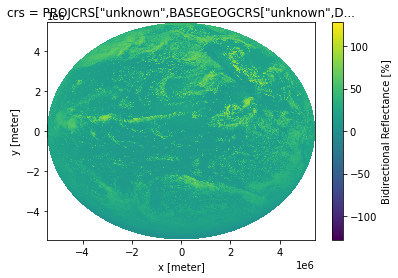

In [8]:
# quickview by xarray plot function
scn_abi['C01'].plot(cmap='viridis')

## LEO

Ofc, Satpy can also easily read polar orbiting satellite data: S5P TROPOMI L2.

In [11]:
f_tropomi = glob('../data/tropomi/S5P*L2__NO2____20220701T1226*')
scn_tropomi = Scene(f_tropomi, reader='tropomi_l2')

In [12]:
scn_tropomi.available_dataset_names()

['aerosol_index_354_388',
 'air_mass_factor_clear',
 'air_mass_factor_cloudy',
 'air_mass_factor_stratosphere',
 'air_mass_factor_total',
 'air_mass_factor_troposphere',
 'apparent_scene_pressure',
 'assembled_lat_bounds',
 'assembled_lon_bounds',
 'averaging_kernel',
 'chi_square',
 'cloud_albedo_crb',
 'cloud_fraction_crb',
 'cloud_fraction_crb_nitrogendioxide_window',
 'cloud_pressure_crb',
 'cloud_radiance_fraction_nitrogendioxide_window',
 'cloud_selection_flag',
 'degrees_of_freedom',
 'eastward_wind',
 'fresco_apparent_scene_pressure',
 'fresco_cloud_albedo_crb',
 'fresco_cloud_fraction_crb',
 'fresco_cloud_pressure_crb',
 'fresco_scene_albedo',
 'fresco_surface_albedo',
 'geolocation_flags',
 'intensity_offset_coefficients',
 'intensity_offset_coefficients_precision',
 'latitude',
 'latitude_bounds',
 'longitude',
 'longitude_bounds',
 'nitrogendioxide_ghost_column',
 'nitrogendioxide_slant_column_density',
 'nitrogendioxide_slant_column_density_precision',
 'nitrogendioxide_st